# An Introduction to Process Mining :Trade Payables Use Case

Most companies have information systems that record activities of interests, such as the registration of a new customer, the sale of a product, the approval of a purchase system, the processing of a payment system, etc. All of these activities result in one or more events being recorded in some information system. These events are usually used for record-keeping, accounting, auditing, etc.

Process mining is concerned with using these recorded activities in order to understand how an organisation works. Using process mining, actual sequence of tasks (events) that are performed can be automatically discovered, revealing the behaviour of the recorded process execution. It is therefore possible to compare the actual process with the expected behaviour and deviations can be detected. This can lead to identification of process diagnostics and preventive action for potential risks and fraud. To learn more about process mining, visit XXXXXX.

Order to cash process is that process in a company which involves receiving a customer's order up until those goods are issued and payment is received. This is what is regularly known as trade receivables. The 02C process is recognised as one of the most important processes within a company because it provides core resources for running a business on a daily basis and strongly influences the availability.

In this post, we will look at how process mining can be used to understand the O2C process of a company. This was done using python and various libraries such as pandas (for analysing the data) and graphviz (for drawing the directly followed graph showing the process).

The dataset was gotten from https://github.com/IBM/processmining. IBM Github repository for process mining.


The event log is structured as follows. The case ID is a combination of the purchase document and the purchase item. There is a total of 76,349 purchase documents containing in total 251,734 items, i.e. there are 251,734 cases. In these cases, there are 1,595,923 events relating to 42 activities performed by 627 users (607 human users and 20 batch users). Sometimes the user field is empty, or NONE, which indicates no user was recorded in the source system.

For each order (case) the following attributes are recorded:

- 1 Key: The purchase ID,
- 2 Date: The date and time of an event,
- 3 User: The user resource involved in the process,
- 4 Activity: The activity performed in the process,
- 5 Product_hierarchy: A text explaining the hierachy of a purchase item,
- 6 NetValue: The value of a purchase item,
- 7 Delivery: The delivery ID of this item,
- 8 Delivery_Date: The delivery date of this item,
- 9 Good_Issue_Date: The date goods was issued. However this was derived,
- 10 Difference: The time difference (in seconds) between the delivery date and goods issue date,
- 11 Customer: The customer id,
- 12 OrderType: Type of order,
- 13 clientCode: The client code,
- 14 NotInTime: Indicating if an order was delayed or not where 1 = delayed and 0 = on time,
- 15 Execution_Status: Indicating if it was a manual or automatic task,
- 16 User_Type: Indicating if the task was done by a human or robot,
- 17 Change_Status: Change indicator,
- 18 ID_Change_Status: The change_status ID,
- 19 Block_Status: Block indicator,
- 20 ID_Block_Status: The Block_Status ID,


In [1]:
import pandas as pd
import numpy as np
import graphviz
# import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df = pd.read_csv("o2c_crypted.csv", thousands='.', decimal=',')
df

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,Delayed,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code
0,7020029102_10,04/01/2016 13:46:13,User1,Line Creation,Customer Service Representative,TLC Optical Cables,773.87,767,NaN,NaN,...,IN TIME,1.452726e+12,1.452726e+12,Manual,Human,no change,With change,no block,With block,LocalFamily1
1,7020029103_10,04/01/2016 13:46:55,User1,Line Creation,Customer Service Representative,TLC Optical Cables,706.50,767,NaN,NaN,...,IN TIME,1.482102e+12,1.452812e+12,Manual,Human,no change,With change,no block,With block,LocalFamily2
2,7020029104_10,04/01/2016 13:47:30,User1,Line Creation,Customer Service Representative,TLC Optical Cables,2168.40,767,NaN,NaN,...,IN TIME,1.453417e+12,1.453417e+12,Manual,Human,no change,With change,no block,With block,LocalFamily2
3,7020029104_20,04/01/2016 13:47:38,User1,Line Creation,Customer Service Representative,TLC Optical Cables,1566.60,767,NaN,NaN,...,IN TIME,1.453417e+12,1.453417e+12,Manual,Human,no change,With change,no block,With block,LocalFamily3
4,7020029104_30,04/01/2016 13:47:43,User1,Line Creation,Customer Service Representative,TLC Optical Cables,1106.85,767,NaN,NaN,...,IN TIME,1.482102e+12,1.453417e+12,Manual,Human,no change,With change,no block,With block,LocalFamily2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251473,7020034883_90,11/07/2017 23:59:59,User66,Good Issue,Customer Service Representative,TLC Optical Cables,59994.48,767,7.050145e+09,02/08/17,...,IN TIME,1.500930e+12,1.500590e+12,Manual,Human,no change,With change,no block,With block,LocalFamily9
251474,7020034883_90,11/07/2017 23:59:59,User66,Good Issue,Customer Service Representative,TLC Optical Cables,59994.48,767,7.050145e+09,02/08/17,...,IN TIME,1.500930e+12,1.500590e+12,Manual,Human,no change,With change,no block,With block,LocalFamily9
251475,7020030338_150,12/07/2017 23:59:59,User66,Good Issue,Customer Service Representative,TLC Optical Cables,89136.00,767,7.050145e+09,07/05/18,...,IN TIME,1.525040e+12,1.501020e+12,Manual,Human,no change,With change,no block,With block,LocalFamily13
251476,7020033072_100,13/07/2017 23:59:59,User66,Good Issue,Customer Service Representative,TLC Optical Cables,17013.15,767,7.050145e+09,01/08/17,...,IN TIME,1.500930e+12,1.500930e+12,Manual,Human,no change,With change,no block,With block,LocalFamily8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251478 entries, 0 to 251477
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Key                251478 non-null  object 
 1   Date               251478 non-null  object 
 2   User               251478 non-null  object 
 3   Activity           251478 non-null  object 
 4   Role               251478 non-null  object 
 5   Product_hierarchy  251478 non-null  object 
 6   NetValue           251478 non-null  float64
 7   Company            251478 non-null  int64  
 8   Delivery           110283 non-null  float64
 9   Delivery_Date      110276 non-null  object 
 10  Good_Issue_Date    251478 non-null  float64
 11  Difference         110283 non-null  float64
 12  Customer           251478 non-null  object 
 13  OrderType          251478 non-null  object 
 14  clientCode         251478 non-null  object 
 15  NotInTime          251478 non-null  int64  
 16  De

## Exploratory Data Analysis

In [4]:
df['Date'] = pd.to_datetime(df['Date'],  dayfirst=True)
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'],  dayfirst=True)
df = df.sort_values(by=['Key', 'Date'], ascending=True).reset_index(drop=True)
df

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,Delayed,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,6920.00,767,NaN,NaT,...,IN TIME,0.0,1.452035e+12,Manual,Human,no change,Without change,no block,With block,NaN
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,6920.00,767,NaN,NaT,...,IN TIME,0.0,1.452035e+12,Manual,Human,no change,Without change,block,With block,NaN
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery,System Automatic Job,TLC Optical Fibres,6920.00,767,7.070100e+09,2016-01-08,...,IN TIME,0.0,1.452030e+12,Automatic,Robot,no change,Without change,no block,With block,NaN
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,6920.00,767,7.070100e+09,2016-01-08,...,IN TIME,0.0,1.452030e+12,Automatic,Robot,no change,Without change,no block,With block,NaN
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,NA Fiber Sales and Service Manager,TLC Optical Fibres,735.25,767,NaN,NaT,...,IN TIME,0.0,1.452726e+12,Manual,Human,no change,Without change,no block,With block,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251473,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,Customer Service Representative,TLC Optical Cables,4725.71,767,NaN,NaT,...,DELAYED,0.0,1.499378e+12,Manual,Human,no change,Without change,block,With block,LocalFamily13
251474,7080001018_40,2017-07-11 15:06:56,User60,Delivery,System Automatic Job,TLC Optical Cables,4725.71,767,7.090001e+09,2017-07-07,...,DELAYED,0.0,1.499380e+12,Automatic,Robot,no change,Without change,no block,With block,LocalFamily13
251475,7080001018_40,2017-07-13 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Cables,4725.71,767,7.090001e+09,2017-07-07,...,DELAYED,0.0,1.499380e+12,Automatic,Robot,no change,Without change,no block,With block,LocalFamily13
251476,7080001026_10,2017-07-13 19:38:08,User5,Line Creation,Customer Service Representative,TLC Optical Cables,4990.43,767,NaN,NaT,...,IN TIME,0.0,1.499897e+12,Manual,Human,no change,Without change,no block,With block,LocalFamily47


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251478 entries, 0 to 251477
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Key                251478 non-null  object        
 1   Date               251478 non-null  datetime64[ns]
 2   User               251478 non-null  object        
 3   Activity           251478 non-null  object        
 4   Role               251478 non-null  object        
 5   Product_hierarchy  251478 non-null  object        
 6   NetValue           251478 non-null  float64       
 7   Company            251478 non-null  int64         
 8   Delivery           110283 non-null  float64       
 9   Delivery_Date      110276 non-null  datetime64[ns]
 10  Good_Issue_Date    251478 non-null  float64       
 11  Difference         110283 non-null  float64       
 12  Customer           251478 non-null  object        
 13  OrderType          251478 non-null  object  

In [6]:
df['Key'].nunique()

45825

In [7]:
df['Date'].aggregate(['min','max'])

min   2016-01-04 13:46:13
max   2017-07-16 16:06:01
Name: Date, dtype: datetime64[ns]

In [8]:
df['Activity'].value_counts()

Delivery                            55215
Good Issue                          55068
Line Creation                       45825
LgstCheckOnConfDat Removed          40292
Header Block Removed                25681
Sched.Line Changed Delivery Date    14287
Document released for credit         4820
Schedule Line Rejected               3182
Address missing Block Set            1412
Address missing Block Removed        1380
LgstCheckOnConfDat Set               1296
Sched.Line Block Removed              972
CTR Block Removed                     943
Document blocked for credit           638
Header Block Set                      451
Sched.Line Block Set                    6
Special test Block Set                  5
Special test Block Removed              4
CTR Block Set                           1
Name: Activity, dtype: int64

In [9]:
df['User'].value_counts()

User9     31810
User61    29027
User60    25702
User43    19026
User20    13565
          ...  
User50        2
User52        1
User40        1
User46        1
User53        1
Name: User, Length: 76, dtype: int64

The dataset comprise of 45825 order request (cases) and 251478 events.

In [10]:
process_flow = df.copy()
process_flow = process_flow[['Key','Date','User','Activity']]
process_flow

,Key,Date,User,Activity
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation
...,...,...,...,...
251473,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed
251474,7080001018_40,2017-07-11 15:06:56,User60,Delivery
251475,7080001018_40,2017-07-13 23:59:59,User61,Good Issue
251476,7080001026_10,2017-07-13 19:38:08,User5,Line Creation


In [11]:
process_flow['Count'] = process_flow.groupby('Key').cumcount()+1
process_flow

,Key,Date,User,Activity,Count
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,1
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,2
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery,3
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue,4
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,1
...,...,...,...,...,...
251473,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,2
251474,7080001018_40,2017-07-11 15:06:56,User60,Delivery,3
251475,7080001018_40,2017-07-13 23:59:59,User61,Good Issue,4
251476,7080001026_10,2017-07-13 19:38:08,User5,Line Creation,1


In [12]:
activities_list = process_flow.copy()
activities_list = activities_list.pivot(index='Key', columns='Count', values='Activity')
# activities_list_full

# Get the last valid index (last activity per case)
def func(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]
    
activities_list['Last Activity'] = activities_list.apply(func, axis=1)
activities_list['First Activity'] = activities_list[1]
activities_list

Count,1,2,3,4,5,6,7,8,9,10,...,382,383,384,385,386,387,388,389,Last Activity,First Activity
Key,,,,,,,,,,,,,,,,,,,,,
0009000481_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000485_10,Line Creation,LgstCheckOnConfDat Set,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000486_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000487_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000487_100,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080001011_20,Line Creation,Header Block Removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Header Block Removed,Line Creation
7080001014_30,Line Creation,Header Block Removed,Delivery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delivery,Line Creation
7080001017_20,Line Creation,Header Block Removed,Delivery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delivery,Line Creation


In [13]:
activities_list['Last Activity'].value_counts()

Good Issue                          36383
Line Creation                        3377
Schedule Line Rejected               3182
LgstCheckOnConfDat Removed           1453
Delivery                              632
Sched.Line Changed Delivery Date      283
Document released for credit          164
Header Block Removed                  131
Address missing Block Removed         118
Address missing Block Set              50
CTR Block Removed                      48
LgstCheckOnConfDat Set                  2
Header Block Set                        2
Name: Last Activity, dtype: int64

In [14]:
(36383/45825)*100

79.39552645935625

In [15]:
activities_list['First Activity'].value_counts()

Line Creation                       42309
Header Block Removed                 3262
Document released for credit          238
LgstCheckOnConfDat Removed             13
Sched.Line Changed Delivery Date        2
Address missing Block Removed           1
Name: First Activity, dtype: int64

In order for us to gain relevant information of the processes, it is important that we use those cases which are completed. To this end, we will fiter out those cases which do not end with "Good Issue". After this filter, we still have 36383 cases representing approximately 79% of our dataset.

In [16]:
xxx1 = activities_list.reset_index()
# xxx1
xxx1 = xxx1[xxx1['Last Activity'] == 'Good Issue'].reset_index(drop=True)
xxx1 = xxx1[['Key','Last Activity']]
xxx1

Count,Key,Last Activity
0,0009000481_10,Good Issue
1,0009000485_10,Good Issue
2,0009000486_10,Good Issue
3,0009000487_10,Good Issue
4,0009000487_100,Good Issue
...,...,...
36378,7080000979_94,Good Issue
36379,7080000990_390,Good Issue
36380,7080000997_10,Good Issue
36381,7080001003_10,Good Issue


In [17]:
process_flow_2 = process_flow.merge(xxx1, on="Key", how='left').dropna(axis=0).reset_index(drop=True)
process_flow_2

,Key,Date,User,Activity,Count,Last Activity
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,1,Good Issue
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,2,Good Issue
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery,3,Good Issue
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue,4,Good Issue
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,1,Good Issue
...,...,...,...,...,...,...
221011,7080001003_10,2017-06-22 23:59:59,User60,Good Issue,4,Good Issue
221012,7080001018_40,2017-07-07 15:37:43,User22,Line Creation,1,Good Issue
221013,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,2,Good Issue
221014,7080001018_40,2017-07-11 15:06:56,User60,Delivery,3,Good Issue


In [18]:
process_flow_2['Key'].nunique()

36383

In [19]:
activities_list_2 = process_flow_2.copy()
activities_list_2 = activities_list_2.pivot(index='Key', columns='Count', values='Activity')
# activities_list_full

# Get the last valid index (last activity per case)
def func(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]
    
activities_list_2['Last Activity'] = activities_list_2.apply(func, axis=1)
activities_list_2['First Activity'] = activities_list_2[1]
activities_list_2

Count,1,2,3,4,5,6,7,8,9,10,...,382,383,384,385,386,387,388,389,Last Activity,First Activity
Key,,,,,,,,,,,,,,,,,,,,,
0009000481_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000485_10,Line Creation,LgstCheckOnConfDat Set,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000486_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000487_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000487_100,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080000979_94,Header Block Removed,Line Creation,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Header Block Removed
7080000990_390,Line Creation,Header Block Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
7080000997_10,Line Creation,Header Block Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation


In [20]:
activities_list_2['First Activity'].value_counts()

Line Creation                       33196
Header Block Removed                 2947
Document released for credit          225
LgstCheckOnConfDat Removed             12
Sched.Line Changed Delivery Date        2
Address missing Block Removed           1
Name: First Activity, dtype: int64

After removing those cases which are not completed, there are some cases which do not start with "Line Creation". We have decided to take out those cases. We are now left with 33196 cases representing approximatey 72% of the dataset. The process flow for the other cases will be analysed further later on

In [21]:
(33196/45825)*100

72.44080741953083

In [22]:
xxx2 = activities_list_2.reset_index()
xxx2 = xxx2[xxx2['First Activity'] == 'Line Creation'].reset_index(drop=True)
xxx2 = xxx2[['Key','First Activity']]
xxx2

Count,Key,First Activity
0,0009000481_10,Line Creation
1,0009000485_10,Line Creation
2,0009000486_10,Line Creation
3,0009000487_10,Line Creation
4,0009000487_100,Line Creation
...,...,...
33191,7080000979_74,Line Creation
33192,7080000990_390,Line Creation
33193,7080000997_10,Line Creation
33194,7080001003_10,Line Creation


In [23]:
process_flow_3 = process_flow_2.merge(xxx2, on="Key", how='left').dropna(axis=0).reset_index(drop=True)
process_flow_3

,Key,Date,User,Activity,Count,Last Activity,First Activity
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,1,Good Issue,Line Creation
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,2,Good Issue,Line Creation
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery,3,Good Issue,Line Creation
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue,4,Good Issue,Line Creation
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,1,Good Issue,Line Creation
...,...,...,...,...,...,...,...
196827,7080001003_10,2017-06-22 23:59:59,User60,Good Issue,4,Good Issue,Line Creation
196828,7080001018_40,2017-07-07 15:37:43,User22,Line Creation,1,Good Issue,Line Creation
196829,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,2,Good Issue,Line Creation
196830,7080001018_40,2017-07-11 15:06:56,User60,Delivery,3,Good Issue,Line Creation


In [24]:
process_flow_3['Key'].nunique()

33196

In [25]:
final_df = process_flow_3.copy()
final_df = final_df[['Key']].drop_duplicates().reset_index(drop=True)
final_df

,Key
0,0009000481_10
1,0009000485_10
2,0009000486_10
3,0009000487_10
4,0009000487_100
...,...
33191,7080000979_74
33192,7080000990_390
33193,7080000997_10
33194,7080001003_10


In [26]:
final_df_2 = final_df.merge(df, on='Key', how='left').reset_index(drop=True)
final_df_2

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,Delayed,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,6920.00,767,NaN,NaT,...,IN TIME,0.0,1.452035e+12,Manual,Human,no change,Without change,no block,With block,NaN
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,6920.00,767,NaN,NaT,...,IN TIME,0.0,1.452035e+12,Manual,Human,no change,Without change,block,With block,NaN
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery,System Automatic Job,TLC Optical Fibres,6920.00,767,7.070100e+09,2016-01-08,...,IN TIME,0.0,1.452030e+12,Automatic,Robot,no change,Without change,no block,With block,NaN
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,6920.00,767,7.070100e+09,2016-01-08,...,IN TIME,0.0,1.452030e+12,Automatic,Robot,no change,Without change,no block,With block,NaN
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,NA Fiber Sales and Service Manager,TLC Optical Fibres,735.25,767,NaN,NaT,...,IN TIME,0.0,1.452726e+12,Manual,Human,no change,Without change,no block,With block,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196827,7080001003_10,2017-06-22 23:59:59,User60,Good Issue,System Automatic Job,TLC Optical Cables,49913.00,767,7.090001e+09,2017-06-19,...,DELAYED,0.0,1.497820e+12,Automatic,Robot,no change,Without change,no block,With block,LocalFamily77
196828,7080001018_40,2017-07-07 15:37:43,User22,Line Creation,Customer Service Representative,TLC Optical Cables,4725.71,767,NaN,NaT,...,DELAYED,0.0,1.499378e+12,Manual,Human,no change,Without change,no block,With block,LocalFamily13
196829,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,Customer Service Representative,TLC Optical Cables,4725.71,767,NaN,NaT,...,DELAYED,0.0,1.499378e+12,Manual,Human,no change,Without change,block,With block,LocalFamily13
196830,7080001018_40,2017-07-11 15:06:56,User60,Delivery,System Automatic Job,TLC Optical Cables,4725.71,767,7.090001e+09,2017-07-07,...,DELAYED,0.0,1.499380e+12,Automatic,Robot,no change,Without change,no block,With block,LocalFamily13


In [27]:
final_df_2.to_csv('o2c_final.csv', index=False)

## Process Discovery

In [28]:
final_df_2['Count'] = final_df_2.groupby('Key').cumcount()+1
final_df_2

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code,Count
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,6920.00,767,NaN,NaT,...,0.0,1.452035e+12,Manual,Human,no change,Without change,no block,With block,NaN,1
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,6920.00,767,NaN,NaT,...,0.0,1.452035e+12,Manual,Human,no change,Without change,block,With block,NaN,2
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery,System Automatic Job,TLC Optical Fibres,6920.00,767,7.070100e+09,2016-01-08,...,0.0,1.452030e+12,Automatic,Robot,no change,Without change,no block,With block,NaN,3
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,6920.00,767,7.070100e+09,2016-01-08,...,0.0,1.452030e+12,Automatic,Robot,no change,Without change,no block,With block,NaN,4
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,NA Fiber Sales and Service Manager,TLC Optical Fibres,735.25,767,NaN,NaT,...,0.0,1.452726e+12,Manual,Human,no change,Without change,no block,With block,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196827,7080001003_10,2017-06-22 23:59:59,User60,Good Issue,System Automatic Job,TLC Optical Cables,49913.00,767,7.090001e+09,2017-06-19,...,0.0,1.497820e+12,Automatic,Robot,no change,Without change,no block,With block,LocalFamily77,4
196828,7080001018_40,2017-07-07 15:37:43,User22,Line Creation,Customer Service Representative,TLC Optical Cables,4725.71,767,NaN,NaT,...,0.0,1.499378e+12,Manual,Human,no change,Without change,no block,With block,LocalFamily13,1
196829,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,Customer Service Representative,TLC Optical Cables,4725.71,767,NaN,NaT,...,0.0,1.499378e+12,Manual,Human,no change,Without change,block,With block,LocalFamily13,2
196830,7080001018_40,2017-07-11 15:06:56,User60,Delivery,System Automatic Job,TLC Optical Cables,4725.71,767,7.090001e+09,2017-07-07,...,0.0,1.499380e+12,Automatic,Robot,no change,Without change,no block,With block,LocalFamily13,3


In [29]:
pflow = final_df_2.copy()
pflow = pflow[['Key','Date','User','Activity','Count']]
pflow

,Key,Date,User,Activity,Count
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,1
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,2
2,0009000481_10,2016-01-06 18:05:04,User61,Delivery,3
3,0009000481_10,2016-01-07 23:59:59,User61,Good Issue,4
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,1
...,...,...,...,...,...
196827,7080001003_10,2017-06-22 23:59:59,User60,Good Issue,4
196828,7080001018_40,2017-07-07 15:37:43,User22,Line Creation,1
196829,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,2
196830,7080001018_40,2017-07-11 15:06:56,User60,Delivery,3


In [30]:
pflow['Activity'].value_counts()

Delivery                            46881
Good Issue                          46881
Line Creation                       33196
LgstCheckOnConfDat Removed          31458
Header Block Removed                20367
Sched.Line Changed Delivery Date    10611
Document released for credit         3366
Address missing Block Removed         866
Address missing Block Set             842
LgstCheckOnConfDat Set                730
CTR Block Removed                     634
Sched.Line Block Removed              509
Document blocked for credit           263
Header Block Set                      221
Sched.Line Block Set                    3
Special test Block Removed              2
Special test Block Set                  1
CTR Block Set                           1
Name: Activity, dtype: int64

### Generating the start and end activities

In [31]:
activities_list_3 = pflow.copy()
activities_list_3 = activities_list_3.pivot(index='Key', columns='Count', values='Activity')
# activities_list_full

# Get the last valid index (last activity per case)
def func(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]
    
activities_list_3['Last Activity'] = activities_list_3.apply(func, axis=1)
activities_list_3['First Activity'] = activities_list_3[1]
activities_list_3

Count,1,2,3,4,5,6,7,8,9,10,...,253,254,255,256,257,258,259,260,Last Activity,First Activity
Key,,,,,,,,,,,,,,,,,,,,,
0009000481_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000485_10,Line Creation,LgstCheckOnConfDat Set,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000486_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000487_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000487_100,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080000979_74,Line Creation,Header Block Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
7080000990_390,Line Creation,Header Block Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
7080000997_10,Line Creation,Header Block Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation


In [32]:
# Start Activities
start_act = activities_list_3.groupby(['First Activity']).size()
start_act = start_act.to_frame(name='Weight').reset_index()
start_act['Start'] = 'Start'
start_act = start_act[['Start','First Activity','Weight']]
start_act = start_act.sort_values(by='Weight', ascending=False).reset_index(drop=True)
start_act

,Start,First Activity,Weight
0,Start,Line Creation,33196


In [33]:
# End Activities
end_act = activities_list_3.groupby(['Last Activity']).size()
end_act = end_act.to_frame(name='Weight').reset_index()
end_act['End'] = 'End'
end_act = end_act[['Last Activity','End','Weight']]
end_act = end_act.sort_values(by='Weight', ascending=False).reset_index(drop=True)
end_act

,Last Activity,End,Weight
0,Good Issue,End,33196


In [34]:
# Process details
new_df_1 = pflow.copy()
new_df_1 = new_df_1[['Key','Date','Activity','User']]
sort1 = new_df_1.iloc[:-1,:].reset_index(drop=True)
sort2 = new_df_1.iloc[1:,:].reset_index(drop=True)
sortnew = pd.concat([sort1,sort2],axis=1)
sortnew.columns = ['Key1','startTime','startActivity','startUser','Key2','endTime','endActivity','endUser']

sortnew1 = sortnew.copy()
sortnew1['Comparison'] = sortnew1.apply(lambda x: True if x['Key1'] == x['Key2'] else False,axis=1)
sortnew1 = sortnew1[sortnew1['Comparison'] == True].reset_index(drop=True)
sortnew1

,Key1,startTime,startActivity,startUser,Key2,endTime,endActivity,endUser,Comparison
0,0009000481_10,2016-01-05 17:10:00,Line Creation,User9,0009000481_10,2016-01-06 16:07:53,LgstCheckOnConfDat Removed,User9,True
1,0009000481_10,2016-01-06 16:07:53,LgstCheckOnConfDat Removed,User9,0009000481_10,2016-01-06 18:05:04,Delivery,User61,True
2,0009000481_10,2016-01-06 18:05:04,Delivery,User61,0009000481_10,2016-01-07 23:59:59,Good Issue,User61,True
3,0009000485_10,2016-01-14 19:07:11,Line Creation,User16,0009000485_10,2016-01-14 19:17:41,LgstCheckOnConfDat Set,User16,True
4,0009000485_10,2016-01-14 19:17:41,LgstCheckOnConfDat Set,User16,0009000485_10,2016-01-14 22:54:30,LgstCheckOnConfDat Removed,User9,True
...,...,...,...,...,...,...,...,...,...
163631,7080001003_10,2017-06-19 23:07:17,Header Block Removed,User19,7080001003_10,2017-06-20 17:16:20,Delivery,User60,True
163632,7080001003_10,2017-06-20 17:16:20,Delivery,User60,7080001003_10,2017-06-22 23:59:59,Good Issue,User60,True
163633,7080001018_40,2017-07-07 15:37:43,Line Creation,User22,7080001018_40,2017-07-07 17:08:47,Header Block Removed,User22,True
163634,7080001018_40,2017-07-07 17:08:47,Header Block Removed,User22,7080001018_40,2017-07-11 15:06:56,Delivery,User60,True


In [35]:
196832 - 163636 

33196

In [36]:
sortnew2 = sortnew1[['Key1', 'startActivity','endActivity']]
countsort2 = sortnew2.groupby(['startActivity','endActivity'], sort=False).size()
newcountsort1 = countsort2.to_frame(name='Count').reset_index()
newcountsort1

,startActivity,endActivity,Count
0,Line Creation,LgstCheckOnConfDat Removed,13239
1,LgstCheckOnConfDat Removed,Delivery,25657
2,Delivery,Good Issue,35141
3,Line Creation,LgstCheckOnConfDat Set,77
4,LgstCheckOnConfDat Set,LgstCheckOnConfDat Removed,536
...,...,...,...
116,Document blocked for credit,Delivery,15
117,LgstCheckOnConfDat Set,Document blocked for credit,1
118,Document blocked for credit,LgstCheckOnConfDat Removed,1
119,Address missing Block Set,LgstCheckOnConfDat Set,2


In [37]:
graph_count = pflow.copy()
graph_count = graph_count['Activity'].value_counts().to_frame().reset_index().rename(columns={'index':'Activity','Activity':'Count'})
graph_count

,Activity,Count
0,Delivery,46881
1,Good Issue,46881
2,Line Creation,33196
3,LgstCheckOnConfDat Removed,31458
4,Header Block Removed,20367
5,Sched.Line Changed Delivery Date,10611
6,Document released for credit,3366
7,Address missing Block Removed,866
8,Address missing Block Set,842
9,LgstCheckOnConfDat Set,730


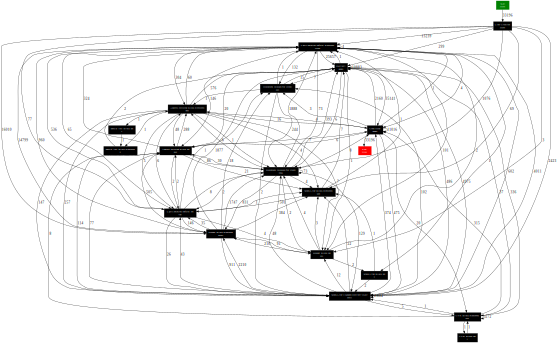

In [38]:
h = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='2_way_match', node_attr={'color': 'black', 'style': 'filled', 'fontcolor':'white','fontsize':'11'}, 
                     edge_attr={'weight': '1'})
h.attr('node', shape='box')
h.attr(rankdir='TB')
# h.attr(nodesep='0.1')
h.attr(size='7.75,10.25')

max_node = 5
max_case_id = newcountsort1['Count'].max()

# create all the possible nodes first
# you can modify the `label` 

for index, row in start_act.iterrows():
    h.node(row['Start'],label=row['Start'] + '\n '+ str(start_act[start_act['Start'] == row['Start']]['Weight'].sum()), _attributes={'color':'green', 'fontcolor':'white'})
    h.node(row['First Activity'],label=row['First Activity'] + '\n '+ str(start_act[start_act['First Activity'] == row['First Activity']]['Weight'].sum()))

for index, row in start_act.iterrows():
    starrt, firstact, weight = [str(i) for i in row]
    h.edge(str(row["Start"]), str(row["First Activity"]), label="  " + weight)
#            , penwidth=str(int(row["Weight"])/max_case_id*max_node))

######################################################

for index, row in newcountsort1.iterrows():
    h.node(row['startActivity'],label=row['startActivity'] + '\n '+ str(graph_count[graph_count['Activity'] == row['startActivity']]['Count'].sum()))
    h.node(row['endActivity'],label=row['endActivity'] + '\n '+ str(graph_count[graph_count['Activity'] == row['endActivity']]['Count'].sum()))

for index, row in newcountsort1.iterrows():
    startevent, endevent, count = [str(i) for i in row]
    h.edge(str(row["startActivity"]), str(row["endActivity"]), label= "  " + count)
#            , penwidth=str(int(row["Count"])/max_case_id*max_node))

######################################################

for index, row in end_act.iterrows():
    h.node(row['Last Activity'],label=row['Last Activity'] + '\n '+ str(graph_count[graph_count['Activity'] == row['Last Activity']]['Count'].sum()))
    h.node(row['End'],label=row['End'] + '\n '+ str(end_act[end_act['End'] == row['End']]['Weight'].sum()),  _attributes={'color':'red', 'fontcolor':'white'})

for index, row in end_act.iterrows():
    lastact, endact, weight = [str(i) for i in row]
    h.edge(str(row["Last Activity"]), str(row["End"]), label= "  " + weight)
#            , penwidth=str(int(row["Weight"])/max_case_id*max_node))

######################################################

# h.view()
h

## Variant Analysis

In [39]:
# Variants
variants = pflow.copy()
# two_way_variants['Count'] = two_way_variants.groupby('case concept:name').cumcount()+1
variants = variants.pivot(index='Key', columns='Count', values='Activity')
variants_col = variants.columns
variants = variants.fillna('X')
variants = variants.astype('str')
variants['Trace'] = variants.apply(lambda x: ','.join(x),axis=1)
variants['Trace'] = variants['Trace'].apply(lambda x: x.replace(',X',''))
variants

Count,1,2,3,4,5,6,7,8,9,10,...,252,253,254,255,256,257,258,259,260,Trace
Key,,,,,,,,,,,,,,,,,,,,,
0009000481_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Line Creation,LgstCheckOnConfDat Removed,Deliv..."
0009000485_10,Line Creation,LgstCheckOnConfDat Set,LgstCheckOnConfDat Removed,Delivery,Good Issue,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Line Creation,LgstCheckOnConfDat Set,LgstCheck..."
0009000486_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Line Creation,LgstCheckOnConfDat Removed,Deliv..."
0009000487_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Line Creation,LgstCheckOnConfDat Removed,Deliv..."
0009000487_100,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Line Creation,LgstCheckOnConfDat Removed,Deliv..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080000979_74,Line Creation,Header Block Removed,Delivery,Good Issue,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Line Creation,Header Block Removed,Delivery,Go..."
7080000990_390,Line Creation,Header Block Removed,Delivery,Good Issue,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Line Creation,Header Block Removed,Delivery,Go..."
7080000997_10,Line Creation,Header Block Removed,Delivery,Good Issue,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Line Creation,Header Block Removed,Delivery,Go..."


In [40]:
variants_num = variants[['Trace',1]].groupby(['Trace'], as_index=False).count()
variants_num = variants_num.sort_values(by=1, ascending=False).reset_index()
del variants_num['index']
variants_num = variants_num.reset_index()
variants_num['index'] = variants_num['index']+1
variants_num = variants_num.rename(columns={'index':'Variants',1:'No of occurance'})
variants_num

Count,Variants,Trace,No of occurance
0,1,"Line Creation,LgstCheckOnConfDat Removed,Deliv...",9925
1,2,"Line Creation,Header Block Removed,LgstCheckOn...",8971
2,3,"Line Creation,Header Block Removed,LgstCheckOn...",1122
3,4,"Line Creation,Header Block Removed,Document re...",933
4,5,"Line Creation,LgstCheckOnConfDat Removed,Heade...",749
...,...,...,...
1470,1471,"Line Creation,Header Block Removed,LgstCheckOn...",1
1471,1472,"Line Creation,Header Block Removed,LgstCheckOn...",1
1472,1473,"Line Creation,Header Block Removed,LgstCheckOn...",1
1473,1474,"Line Creation,Header Block Removed,LgstCheckOn...",1


In [41]:
variants_2 = variants.copy()
variants_2 = variants_2.reset_index()
variants_2 = variants_2.merge(variants_num, on='Trace', how='left')
variants_2 = variants_2[['Key','Variants']]
variants_2

Count,Key,Variants
0,0009000481_10,1
1,0009000485_10,759
2,0009000486_10,1
3,0009000487_10,1
4,0009000487_100,1
...,...,...
33191,7080000979_74,11
33192,7080000990_390,11
33193,7080000997_10,11
33194,7080001003_10,11


In [42]:
list(variants_num['Trace'][:5])

['Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue',
 'Line Creation,Header Block Removed,LgstCheckOnConfDat Removed,Delivery,Good Issue',
 'Line Creation,Header Block Removed,LgstCheckOnConfDat Removed,Sched.Line Changed Delivery Date,Delivery,Good Issue',
 'Line Creation,Header Block Removed,Document released for credit,LgstCheckOnConfDat Removed,Delivery,Good Issue',
 'Line Creation,LgstCheckOnConfDat Removed,Header Block Removed,Delivery,Good Issue']

## Timing Details

In [43]:
timing_detils = pflow.copy()
timing_detils = timing_detils.pivot(index='Key',columns='Count', values='Date')
timing_detils

Count,1,2,3,4,5,6,7,8,9,10,...,251,252,253,254,255,256,257,258,259,260
Key,,,,,,,,,,,,,,,,,,,,,
0009000481_10,2016-01-05 17:10:00,2016-01-06 16:07:53,2016-01-06 18:05:04,2016-01-07 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0009000485_10,2016-01-14 19:07:11,2016-01-14 19:17:41,2016-01-14 22:54:30,2016-01-15 16:31:35,2016-01-15 23:59:59,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0009000486_10,2016-01-18 15:27:37,2016-01-18 16:11:24,2016-01-18 17:19:35,2016-01-18 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0009000487_10,2016-01-19 20:18:45,2016-01-19 20:19:53,2016-01-25 20:12:35,2016-01-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
0009000487_100,2016-01-19 20:18:54,2016-01-19 20:19:53,2016-01-25 20:12:35,2016-01-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080000979_74,2017-05-10 18:13:18,2017-05-10 18:25:04,2017-06-02 23:23:47,2017-06-02 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7080000990_390,2017-05-31 21:37:46,2017-06-02 16:38:56,2017-06-19 16:38:35,2017-07-05 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7080000997_10,2017-06-09 17:23:44,2017-06-09 17:30:35,2017-06-26 16:49:42,2017-06-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [44]:
timing_detils['Max'] = timing_detils.apply(max, axis=1)
timing_detils['Case Duration'] = timing_detils['Max'] - timing_detils[1]
# .dt.total_seconds().div(86400)
timing_detils

Count,1,2,3,4,5,6,7,8,9,10,...,253,254,255,256,257,258,259,260,Max,Case Duration
Key,,,,,,,,,,,,,,,,,,,,,
0009000481_10,2016-01-05 17:10:00,2016-01-06 16:07:53,2016-01-06 18:05:04,2016-01-07 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-07 23:59:59,2 days 06:49:59
0009000485_10,2016-01-14 19:07:11,2016-01-14 19:17:41,2016-01-14 22:54:30,2016-01-15 16:31:35,2016-01-15 23:59:59,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-15 23:59:59,1 days 04:52:48
0009000486_10,2016-01-18 15:27:37,2016-01-18 16:11:24,2016-01-18 17:19:35,2016-01-18 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-18 23:59:59,0 days 08:32:22
0009000487_10,2016-01-19 20:18:45,2016-01-19 20:19:53,2016-01-25 20:12:35,2016-01-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-26 23:59:59,7 days 03:41:14
0009000487_100,2016-01-19 20:18:54,2016-01-19 20:19:53,2016-01-25 20:12:35,2016-01-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-26 23:59:59,7 days 03:41:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080000979_74,2017-05-10 18:13:18,2017-05-10 18:25:04,2017-06-02 23:23:47,2017-06-02 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-06-02 23:59:59,23 days 05:46:41
7080000990_390,2017-05-31 21:37:46,2017-06-02 16:38:56,2017-06-19 16:38:35,2017-07-05 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-07-05 23:59:59,35 days 02:22:13
7080000997_10,2017-06-09 17:23:44,2017-06-09 17:30:35,2017-06-26 16:49:42,2017-06-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-06-26 23:59:59,17 days 06:36:15


In [45]:
timing_detils['Case Duration'] = timing_detils['Case Duration'].apply(lambda x: round(x.total_seconds(),0))
timing_detils['Case Duration'] = round(timing_detils['Case Duration']/86400,2)
timing_detils

Count,1,2,3,4,5,6,7,8,9,10,...,253,254,255,256,257,258,259,260,Max,Case Duration
Key,,,,,,,,,,,,,,,,,,,,,
0009000481_10,2016-01-05 17:10:00,2016-01-06 16:07:53,2016-01-06 18:05:04,2016-01-07 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-07 23:59:59,2.28
0009000485_10,2016-01-14 19:07:11,2016-01-14 19:17:41,2016-01-14 22:54:30,2016-01-15 16:31:35,2016-01-15 23:59:59,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-15 23:59:59,1.20
0009000486_10,2016-01-18 15:27:37,2016-01-18 16:11:24,2016-01-18 17:19:35,2016-01-18 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-18 23:59:59,0.36
0009000487_10,2016-01-19 20:18:45,2016-01-19 20:19:53,2016-01-25 20:12:35,2016-01-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-26 23:59:59,7.15
0009000487_100,2016-01-19 20:18:54,2016-01-19 20:19:53,2016-01-25 20:12:35,2016-01-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-01-26 23:59:59,7.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080000979_74,2017-05-10 18:13:18,2017-05-10 18:25:04,2017-06-02 23:23:47,2017-06-02 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-06-02 23:59:59,23.24
7080000990_390,2017-05-31 21:37:46,2017-06-02 16:38:56,2017-06-19 16:38:35,2017-07-05 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-07-05 23:59:59,35.10
7080000997_10,2017-06-09 17:23:44,2017-06-09 17:30:35,2017-06-26 16:49:42,2017-06-26 23:59:59,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-06-26 23:59:59,17.28


In [46]:
max_length = pflow['Count'].max()

In [47]:
timing_detils = timing_detils.drop(variants_col, axis=1)
timing_detils

Count,Max,Case Duration
Key,,
0009000481_10,2016-01-07 23:59:59,2.28
0009000485_10,2016-01-15 23:59:59,1.20
0009000486_10,2016-01-18 23:59:59,0.36
0009000487_10,2016-01-26 23:59:59,7.15
0009000487_100,2016-01-26 23:59:59,7.15
...,...,...
7080000979_74,2017-06-02 23:59:59,23.24
7080000990_390,2017-07-05 23:59:59,35.10
7080000997_10,2017-06-26 23:59:59,17.28


In [48]:
timing_detils_2 = timing_detils.copy()
timing_detils_2 = timing_detils_2.reset_index()
timing_detils_2 = timing_detils_2[['Key','Case Duration']]
timing_detils_2

Count,Key,Case Duration
0,0009000481_10,2.28
1,0009000485_10,1.20
2,0009000486_10,0.36
3,0009000487_10,7.15
4,0009000487_100,7.15
...,...,...
33191,7080000979_74,23.24
33192,7080000990_390,35.10
33193,7080000997_10,17.28
33194,7080001003_10,3.04


In [49]:
final_df_2.head(2)

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code,Count
0,0009000481_10,2016-01-05 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,6920.0,767,NaN,NaT,...,0.0,1.452035e+12,Manual,Human,no change,Without change,no block,With block,NaN,1
1,0009000481_10,2016-01-06 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,6920.0,767,NaN,NaT,...,0.0,1.452035e+12,Manual,Human,no change,Without change,block,With block,NaN,2


In [50]:
with pd.option_context('display.max_rows', None):
  display(final_df_2[final_df_2['Count'] == 1].groupby(['Customer','OrderType','Product_hierarchy']).agg({'Key':['count'],'NetValue':['sum']}))

Key     NetValue
                                                            count          sum
Customer     OrderType            Product_hierarchy                           
Customer 1   US-Free of charge    TLC Optical Cables           46         0.00
             US-Std. Order        TLC Connectivity            100    522900.44
                                  TLC Optical Cables         1350   8731125.07
Customer 10  US-IC Order Fiber    TLC Optical Fibres         1184  25950676.94
Customer 100 US-Free of charge    TLC Optical Cables            2         0.00
             US-Std. Order        TLC Optical Cables           20     24254.68
Customer 101 US-Free of charge    TLC Optical Cables            1         0.00
             US-Return Order      TLC Optical Cables           12    104566.50
             US-Std. Order        TLC Optical Cables            9     89606.10
Customer 102 US-Std. Order        TLC Optical Cables           22     54355.15
Customer 103 US-Std. I/C Order    TLC Optical Cables           13     44719.45
Customer 104 US-Std. Order        TLC Optical Cables           48     46328.00
Customer 105 US-Std. Order        TLC Optical Cables            1      1882.72
Customer 106 US-Std. Order        TLC Optical Cables            2     41709.71
Customer 107 US-Std. Order        TLC Optical Cables            6     46678.42
Customer 108 US-Return Order      TLC Optical Cables            1       263.76
             US-Std. Order        TLC Optical Cables            7      4354.04
Customer 109 US-Std. Order        TLC Optical Cables            1       626.00
Customer 11  US-Free of charge    TLC Optical Cables           10         0.00
             US-Std. Order        TLC Optical Cables          354    491083.69
Customer 110 US-Return Order      TLC Optical Cables           31     50344.00
             US-Std. Order        TLC Optical Cables            2    314779.04
Customer 111 US-Free of charge    TLC Optical Cables            1         0.00
             US-Std. Order        TLC Optical Cables            1     49296.91
Customer 113 US-Std. Order Fiber  TLC Optical Fibres            2      2000.00
Customer 114 US-Free of charge    TLC Optical Cables            1         0.00
             US-Return Order      TLC Optical Cables            3     10537.45
             US-Std. Order        TLC Optical Cables           63    636852.67
Customer 115 US-Std. Order        TLC Optical Cables            1      7550.00
Customer 116 US-Std. Order Fiber  TLC Optical Fibres            2      3499.97
Customer 117 US-Free of charge    TLC Optical Cables            1         0.00
             US-Std. Order        TLC Optical Cables           15    577628.40
Customer 118 US-Std. Order        TLC Optical Cables           36    240572.78
Customer 119 US-Free of charge    TLC Optical Cables            1         0.00
             US-Std. Order        TLC Optical Cables           24    224355.68
Customer 12  US-Return Order      TLC Optical Cables            5     73476.66
             US-Std. Order        TLC Optical Cables          316   8328332.85
Customer 120 US-IC Order Fiber    TLC Optical Fibres           22    239803.20
Customer 121 US-Std. Order        TLC Optical Cables            7     19028.62
Customer 122 US-Free of charge    TLC Optical Cables            1         0.00
             US-Std. Order        TLC Connectivity              3       420.00
                                  TLC Optical Cables           13     34821.75
Customer 123 US-Std. Order        TLC Optical Cables            1      3511.20
Customer 124 US-Std. Order        TLC Optical Cables            2       958.00
Customer 125 US-Std. Order        TLC Optical Cables           31    391097.78
Customer 126 US-Std. Order        TLC Optical Cables           33    401507.78
Customer 127 US-IC Order Fiber    TLC Optical Fibres           18    473760.00
Customer 128 US-Std. Order        TLC Optical Cables           40    268547.07
Customer 129 US-Std. Order       

In [51]:
final_df_2.columns

Index(['Key', 'Date', 'User', 'Activity', 'Role', 'Product_hierarchy',
       'NetValue', 'Company', 'Delivery', 'Delivery_Date', 'Good_Issue_Date',
       'Difference', 'Customer', 'OrderType', 'clientCode', 'NotInTime',
       'Delayed', 'PromiseMAD', 'ActualMAD', 'Execution_Status', 'User_Type',
       'Change_Status', 'ID_Change_Status', 'Block_Status', 'ID_Block_Status',
       'Local_Family_code', 'Count'],
      dtype='object')

In [52]:
other_info = final_df_2.copy()
other_info = other_info[['Key', 'Product_hierarchy','NetValue', 'Company', 'Customer', 'OrderType','Count']]
other_info = other_info[other_info['Count'] == 1].reset_index(drop=True)
other_info = other_info.merge(timing_detils_2,on='Key',how='outer')
other_info = other_info.merge(variants_2,on='Key',how='outer')
other_info

,Key,Product_hierarchy,NetValue,Company,Customer,OrderType,Count,Case Duration,Variants
0,0009000481_10,TLC Optical Fibres,6920.00,767,Customer 260,US-Internal Transfer,1,2.28,1
1,0009000485_10,TLC Optical Fibres,735.25,767,Customer 260,US-Internal Transfer,1,1.20,759
2,0009000486_10,TLC Optical Fibres,735.25,767,Customer 260,US-Internal Transfer,1,0.36,1
3,0009000487_10,TLC Optical Fibres,2856.00,767,Customer 260,US-Internal Transfer,1,7.15,1
4,0009000487_100,TLC Optical Fibres,2856.00,767,Customer 260,US-Internal Transfer,1,7.15,1
...,...,...,...,...,...,...,...,...,...
33191,7080000979_74,TLC Optical Cables,8716.00,767,Customer 247,US-Return Order,1,23.24,11
33192,7080000990_390,TLC Optical Cables,13150.62,767,Customer 40,US-Return Order,1,35.10,11
33193,7080000997_10,TLC Optical Cables,6499.49,767,Customer 14,US-Return Order,1,17.28,11
33194,7080001003_10,TLC Optical Cables,49913.00,767,Customer 88,US-Return Order,1,3.04,11


In [53]:
other_info.to_csv('o2c_other_info.csv', index=False)

In [54]:
newcountsort1[newcountsort1['startActivity'] == 'CTR Block Set']

,startActivity,endActivity,Count
83,CTR Block Set,CTR Block Removed,1


In [55]:
pflow['Activity'].value_counts()

Delivery                            46881
Good Issue                          46881
Line Creation                       33196
LgstCheckOnConfDat Removed          31458
Header Block Removed                20367
Sched.Line Changed Delivery Date    10611
Document released for credit         3366
Address missing Block Removed         866
Address missing Block Set             842
LgstCheckOnConfDat Set                730
CTR Block Removed                     634
Sched.Line Block Removed              509
Document blocked for credit           263
Header Block Set                      221
Sched.Line Block Set                    3
Special test Block Removed              2
Special test Block Set                  1
CTR Block Set                           1
Name: Activity, dtype: int64

In [56]:
# .apply(lambda x: round(x.total_seconds(),0))